In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
cwd = os.getcwd()

ROOT = os.path.join(cwd, '../')
DATA_FOLDER = os.path.join(ROOT, 'data/')

df = pd.read_pickle(os.path.join(DATA_FOLDER, 'saeb_treated.pkl'))
df.head()

,ano,sigla_uf,escola_publica,id_aluno,situacao_censo,disciplina,proficiencia,erro_padrao,proficiencia_saeb,erro_padrao_saeb,...,frequenta_festas_comunidade,gosta_estudar_disciplina,faz_licao_casa,correcao_licao_casa,utiliza_biblioteca_escola,rede,id_escola,serie,turno,desempenho_aluno_cat
274,2015,PB,1,17518688,0,MT,-0.472096,0.538400,223.577837,30.092429,...,1.0,1.0,2.0,2.0,0.0,2,25077147,9,1,0
348,2015,PB,1,17518163,0,MT,-0.809452,0.580177,204.722224,32.427443,...,1.0,0.0,1.0,2.0,1.0,2,61135320,9,1,0
408,2015,PB,1,17491526,0,LP,-0.828752,0.366511,204.326255,20.192323,...,NaN,1.0,1.0,2.0,1.0,2,25034820,9,1,1
1594,2015,PB,1,17489545,0,MT,-0.069178,0.583999,246.097862,32.641064,...,1.0,1.0,0.0,2.0,0.0,2,25030620,9,2,1
1847,2015,PB,1,17561474,0,MT,-0.462874,0.543093,224.093276,30.354732,...,2.0,1.0,NaN,2.0,2.0,2,25120760,9,3,0


In [60]:
# valores unicos para cada variável, menos as de exclude
exclude = ['ano', 'sigla_uf', 'id_aluno', 'situacao_censo', 'disciplina', 'proficiencia', 'erro_padrao', 'proficiencia_saeb',
       'erro_padrao_saeb', 'sexo', 'raca_cor','ano_nascimento', 'rede', 'id_escola', 'serie', 'turno', 'escola_publica', 'desempenho_aluno']

for col in df.columns:
    if col not in exclude:
        print(f'{col}: {df[col].unique()}')

idade: [14 18 17 16 15 13]
escolaridade_mae: [ 1. nan  0.  3.  2.  5.  4.]
mae_sabe_ler_escrever: [0 1]
mae_le: [ 0. nan  1.]
escolaridade_pai: [ 1.  2.  0.  3.  4.  5. nan]
pai_sabe_ler_escrever: [ 0.  1. nan]
pai_le: [ 0.  1. nan]
responsaveis_incentivam_realizacao_licao_casa: [ 1.  0. nan]
responsaveis_incentivam_estudos: [ 1.  0. nan]
responsaveis_incentivam_leitura: [ 1.  0. nan]
responsaveis_incentivam_comparecer_aulas: [ 1.  0. nan]
possui_computador: [ 0. nan  1.  4.  2.  3.]
tempo_lazer: [ 4.  1.  3.  2.  0. nan]
leitura_jornais: [ 1.  0.  2. nan]
leitura_livros_geral: [ 0.  1.  2. nan]
leitura_literatura_infantojuvenil: [ 0.  2.  1. nan]
leitura_historia_quadrinhos: [ 1.  0.  2. nan]
leitura_revista_comportamento: [ 1.  0.  2. nan]
leitura_revistas_geral: [ 0.  2. nan  1.]
leitura_internet: [ 2.  0.  1. nan]
frequenta_biblioteca: [ 0. nan  1.  2.]
frequenta_cinema: [ 0. nan  1.  2.]
frequenta_espetaculo_exposicao: [ 0. nan  1.  2.]
frequenta_festas_comunidade: [ 1. nan  2.  0

# merging cols

<AxesSubplot: xlabel='leitura', ylabel='Count'>

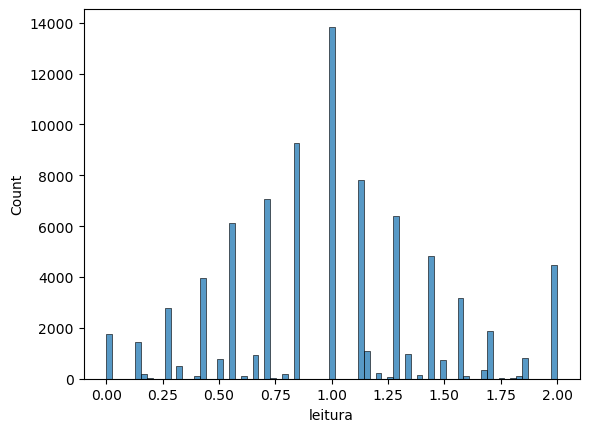

In [61]:
# feature engineering para as colunas de leitura
# a nova coluna 'leitura' terá a média dos valores para cada coluna de leitura_
# para cada aluno

columns_oi = [col for col in df.columns if 'leitura_' in col]
df['leitura'] = df[columns_oi].mean(axis=1)

df = df.drop(columns=columns_oi)
sns.histplot(df['leitura'])

<AxesSubplot: xlabel='frequenta_entretenimento', ylabel='Count'>

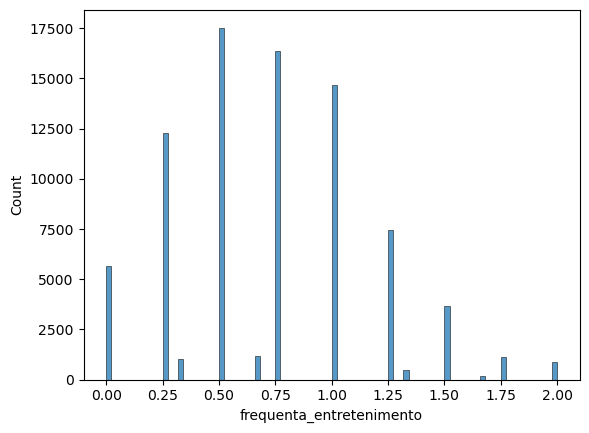

In [62]:
# colunas de 'frequenta_'
# criar uma nova coluna 'frequenta que conterá a média dos valores
# para cada aluno

columns_oi = [col for col in df.columns if 'frequenta_' in col]
df['frequenta_entretenimento'] = df[columns_oi].mean(axis=1)
df = df.drop(columns=columns_oi)
sns.histplot(df['frequenta_entretenimento'])

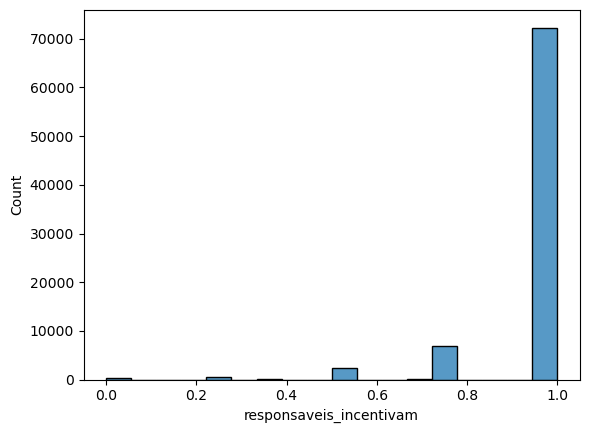

In [63]:
# responsaveis incentivam

columns_oi = [col for col in df.columns if 'responsaveis_incentivam' in col]

df['responsaveis_incentivam'] = df[columns_oi].mean(axis=1)
sns.histplot(df['responsaveis_incentivam'])

df = df.drop(columns=columns_oi)

<AxesSubplot: xlabel='escolaridade_pais', ylabel='Count'>

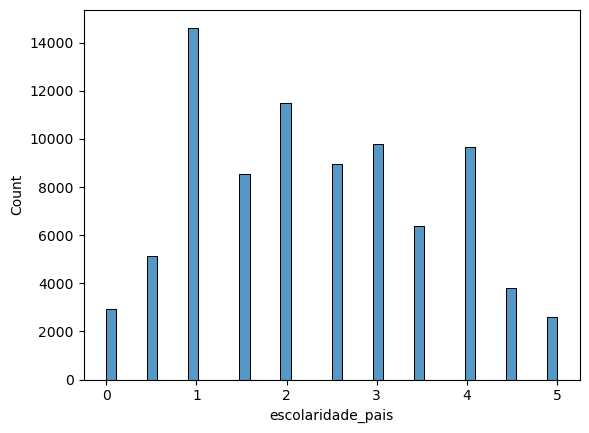

In [64]:
# escolaridade pai / mae
# Nunca estudou.	Não completou a 4.ª série/5.º ano.	Completou a 4.ª série/5.º ano, mas não completou a 8.ª série/9.º ano.	Completou a 8.ª série/9.º ano, mas não completou o Ensino Médio.	Completou o Ensino Médio, mas não completou a Faculdade.	Completou a Faculdade.
# 0	1	2	3	4	5

columns_oi = [col for col in df.columns if 'escolaridade_pai' in col] + [col for col in df.columns if 'escolaridade_mae' in col]

df['escolaridade_pais'] = df[columns_oi].mean(axis=1)
df = df.drop(columns=columns_oi)
sns.histplot(df['escolaridade_pais'])

<AxesSubplot: xlabel='leitura_pais', ylabel='Count'>

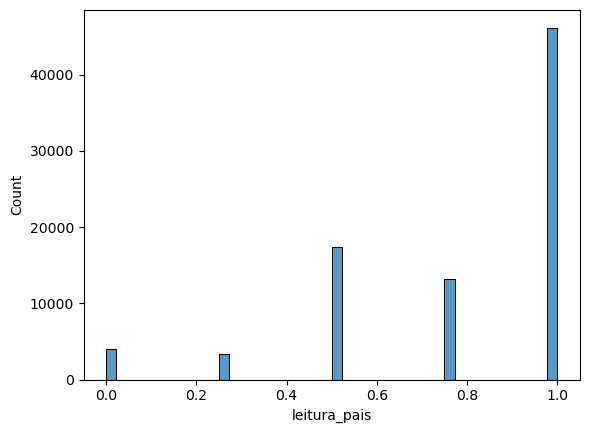

In [65]:
# leitura / escrita dos pais

df['leitura_mae'] = df[['mae_le', 'mae_sabe_ler_escrever']].mean(axis=1)
df['leitura_pai'] = df[['pai_le', 'pai_sabe_ler_escrever']].mean(axis=1)

df['leitura_pais'] = df[['leitura_mae', 'leitura_pai']].mean(axis=1)
df = df.drop(columns=['leitura_mae', 'leitura_pai'])
df = df.drop(columns=['pai_le', 'pai_sabe_ler_escrever', 'mae_le', 'mae_sabe_ler_escrever'])
sns.histplot(df['leitura_pais'])

In [66]:
# possui_computador
# Na sua casa tem computador?	Não tem.	Sim, um.	Sim, dois.	Sim, três.	Sim, quatro ou mais.

# separando em possui, ou não

columns_oi = ['possui_computador']
print(df[columns_oi].sum(axis=1).apply(lambda x: 1 if x > 0 else 0).value_counts())

df['possui_computador'] = df[columns_oi].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

0    45784
1    38390
Name: count, dtype: int64


In [67]:
# faz_licao_casa
# correcao_licao_casa
# utiliza_biblioteca_escola

# mesma lógica das anteriores
columns_oi = ['faz_licao_casa', 'correcao_licao_casa', 'utiliza_biblioteca_escola']

# media
df['estuda_regularmente'] = df[columns_oi].mean(axis=1)

df = df.drop(columns=columns_oi)
df['estuda_regularmente'].value_counts()

estuda_regularmente
1.333333    26449
1.666667    23333
1.000000    14090
2.000000     9790
0.666667     5068
0.333333     1634
0.000000     1414
1.500000      681
0.500000      281
Name: count, dtype: int64

In [68]:
for column in df.columns:
    if column not in exclude:
        print(f'{column}')

idade
possui_computador
tempo_lazer
gosta_estudar_disciplina
desempenho_aluno_cat
leitura
frequenta_entretenimento
responsaveis_incentivam
escolaridade_pais
leitura_pais
estuda_regularmente


In [70]:
save = True
if save:
    df.to_pickle(os.path.join(DATA_FOLDER, 'saeb_treated_new.pkl'))